In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data=pd.read_csv("GOOG (1).csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-13,296.630707,299.551697,295.125488,295.388794,295.388794,4828000
1,2010-12-14,296.615814,297.211914,294.325684,295.532837,295.532837,3307900
2,2010-12-15,295.180145,296.297882,292.671448,293.242737,293.242737,4363500
3,2010-12-16,294.509491,294.966522,292.134949,293.943176,293.943176,3214400
4,2010-12-17,293.590485,294.365448,291.936249,293.491119,293.491119,6214200


In [4]:
X_train=data.drop(["Date","Adj Close","Close","Volume","Open"],axis=1)

In [5]:
name=["Close"]
column=set(data.columns)-set(name)
y_train=data.drop(column,axis=1)

In [7]:
x_tr=X_train.values
y_tr=y_train.values

In [8]:
x_tr.dtype

dtype('float64')

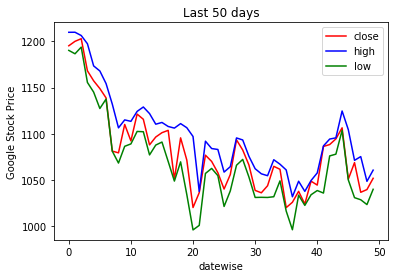

In [15]:
plt.plot(y_tr[-50:],color = 'red', label = 'close')
plt.plot(x_tr[-50:,0], color = 'blue', label ="high")
plt.plot(x_tr[-50:,1], color = 'green', label ="low")

plt.title('Last 50 days')
plt.xlabel('datewise')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(x_tr)
X = scaler.transform(x_tr)


In [17]:
X=np.reshape(X,(X.shape[0],1,X.shape[1]))

In [18]:
X.shape

(2013, 1, 2)

In [19]:
scaler=scaler.fit(y_tr)
Y=scaler.transform(y_tr)

In [20]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Activation,Dropout

Using TensorFlow backend.


In [132]:
model=Sequential()
model.add(LSTM(100,activation="tanh",recurrent_activation="hard_sigmoid",input_shape=(1,2)))

model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100)               41200     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 41,301
Trainable params: 41,301
Non-trainable params: 0
_________________________________________________________________


In [133]:
from sklearn import metrics

In [136]:
model.compile(loss="MSE",optimizer="adam",metrics=["mae"])

In [137]:
model.fit(X,Y,epochs=50,batch_size=8,verbose=2,shuffle=True)

Epoch 1/50
 - 2s - loss: 2.6879e-05 - mean_absolute_error: 0.0037
Epoch 2/50
 - 1s - loss: 2.7722e-05 - mean_absolute_error: 0.0038
Epoch 3/50
 - 1s - loss: 2.4948e-05 - mean_absolute_error: 0.0035
Epoch 4/50
 - 1s - loss: 2.2468e-05 - mean_absolute_error: 0.0033
Epoch 5/50
 - 1s - loss: 2.6344e-05 - mean_absolute_error: 0.0036
Epoch 6/50
 - 1s - loss: 2.2701e-05 - mean_absolute_error: 0.0033
Epoch 7/50
 - 1s - loss: 2.9041e-05 - mean_absolute_error: 0.0038
Epoch 8/50
 - 1s - loss: 2.6619e-05 - mean_absolute_error: 0.0036
Epoch 9/50
 - 1s - loss: 2.6702e-05 - mean_absolute_error: 0.0036
Epoch 10/50
 - 1s - loss: 2.4868e-05 - mean_absolute_error: 0.0036
Epoch 11/50
 - 1s - loss: 2.3113e-05 - mean_absolute_error: 0.0034
Epoch 12/50
 - 1s - loss: 2.8218e-05 - mean_absolute_error: 0.0038
Epoch 13/50
 - 1s - loss: 2.3832e-05 - mean_absolute_error: 0.0034
Epoch 14/50
 - 2s - loss: 2.4042e-05 - mean_absolute_error: 0.0034
Epoch 15/50
 - 1s - loss: 2.7873e-05 - mean_absolute_error: 0.0037
Epoc

In [138]:
model.save("google_stock.hd5")

In [139]:
xp=model.predict(X)
xp=scaler.inverse_transform(xp)

In [140]:
y_tr[-1:]

array([[1051.75]])

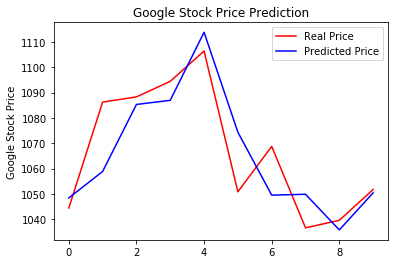

In [141]:
plt.plot(y_tr[-10:],color = 'red', label = 'Real Price')
plt.plot(xp[-10:], color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [147]:
"""
"today_prediction
"""
today=np.array([[1070.40,1050.10]])
xday=scaler.transform(today)
print xday.shape
xday=np.reshape(xday,(xday.shape[0],1,xday.shape[1]))
pred_=model.predict(xday)

xday=scaler.inverse_transform(pred_)
print "prediction" ,xday









(1, 2)
prediction [[1053.5214]]
